In [1]:
# coding:utf-8

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import glob

Using TensorFlow backend.


In [2]:
folder = ["drycleaning_P_weak","do_not_tumble_dry","ironing_upto150","ironing_upto110"]
image_size = 50

X = []
Y = []
for index, name in enumerate(folder):
    dir = "./images/" + name
    files = glob.glob(dir + "/*.png")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)

X = np.array(X)
Y = np.array(Y)

In [3]:
X = X.astype('float32')
X = X / 255.0
X.shape

(17136, 50, 50, 3)

In [4]:
# 正解ラベルの形式を変換
Y = np_utils.to_categorical(Y, 4)

In [5]:
# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [6]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [7]:
#訓練
history = model.fit(X_train, y_train, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
13708/13708 [==============================] - 98s 7ms/step - loss: 1.1925 - acc: 0.4689
Epoch 2/5
13708/13708 [==============================] - 91s 7ms/step - loss: 0.3724 - acc: 0.8627
Epoch 3/5
13708/13708 [==============================] - 91s 7ms/step - loss: 0.1712 - acc: 0.9401
Epoch 4/5
13708/13708 [==============================] - 91s 7ms/step - loss: 0.1034 - acc: 0.9632
Epoch 5/5
13708/13708 [==============================] - 92s 7ms/step - loss: 0.0774 - acc: 0.9731


In [8]:
#評価 & 評価結果出力
print(model.evaluate(X_test, y_test))


3428/3428 [==============================] - 5s 1ms/step
[0.04312724448836114, 0.9889148191365228]


In [9]:
# モデルの保存
open('and.json',"w").write(model.to_json())

# 学習済みの重みを保存
model.save_weights('and_weight.hdf5')

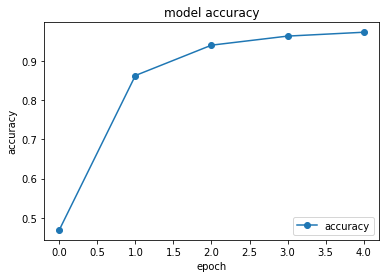

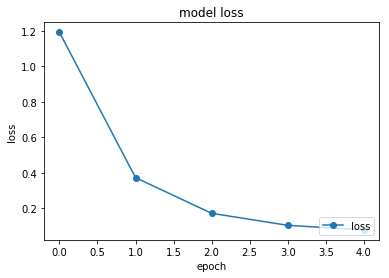

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
#     plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
#     plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

plot_history(history)